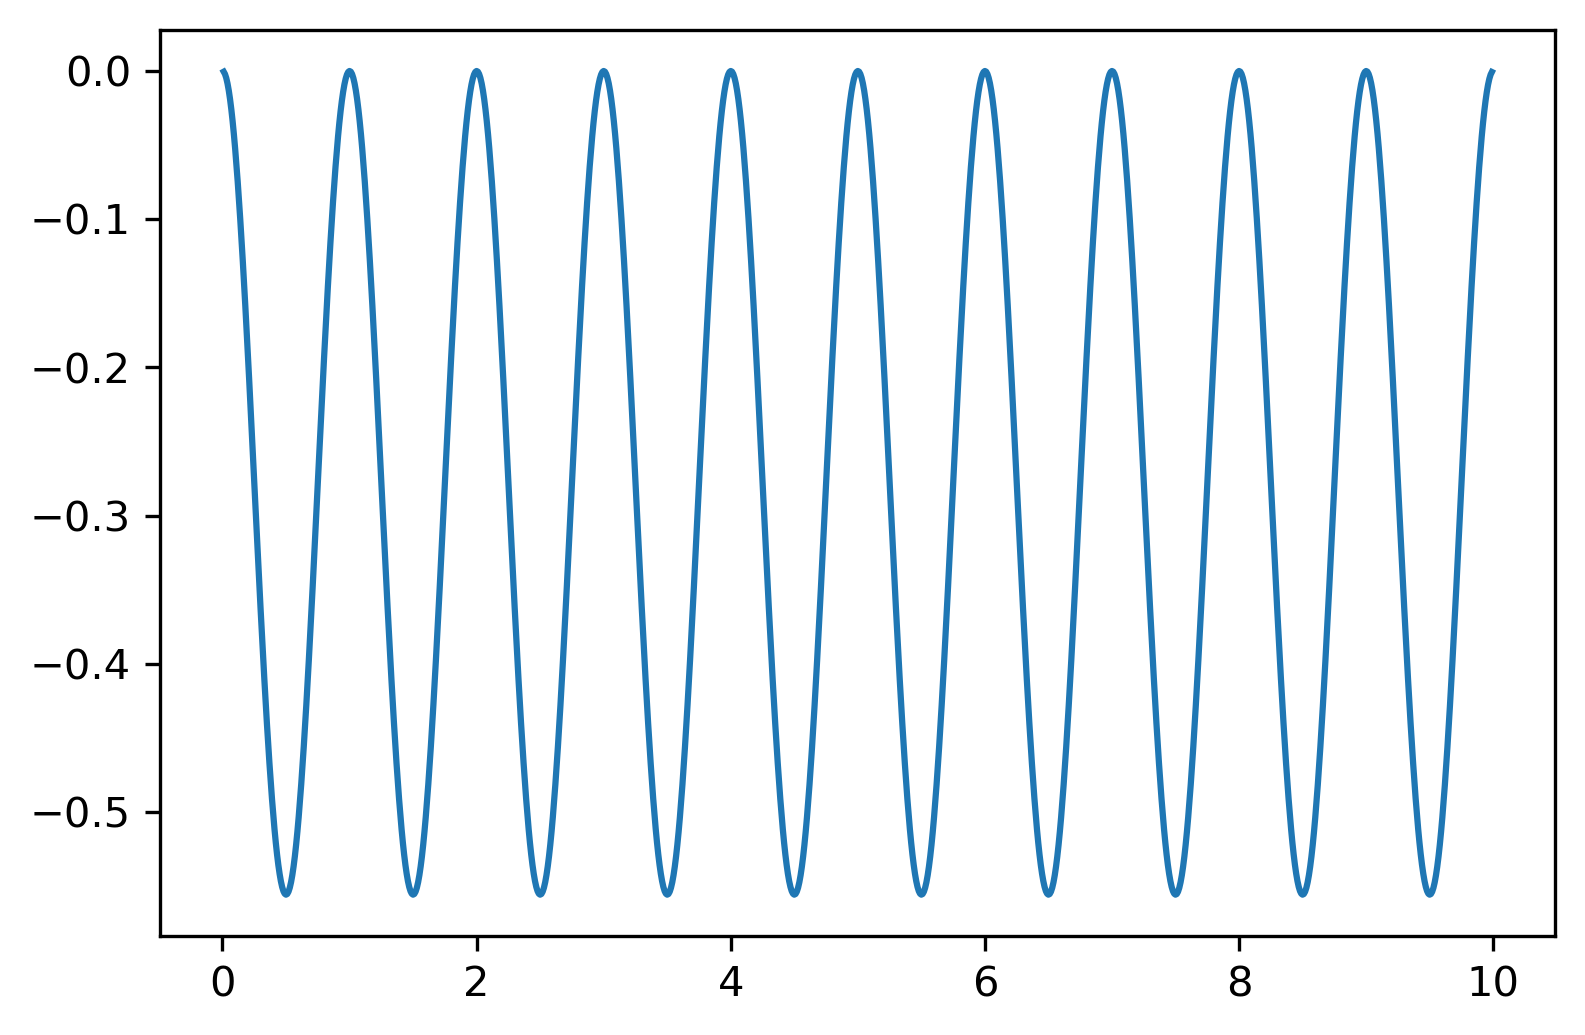

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

##################################
dt = 4*0.0001953125
outf = r'test_torque_out_extra_'+str(dt)+'dt.txt'
n = 1000
nv = 12

angle = 0
omega = 1
t = nv - 1
##################################

f = open(outf, "r")
allLines = f.readlines()

data = np.zeros((n, nv))

for i in range(n):
    datum = allLines[i].split()
    for j in range(nv):
        data[i,j] = float(datum[j])
        
# plt.plot(data[1:,t],data[1:,angle]*180/np.pi)
plt.plot(data[1:,t],data[1:,angle]*180/np.pi)

Text(0.5, 0, 'dt (years)')

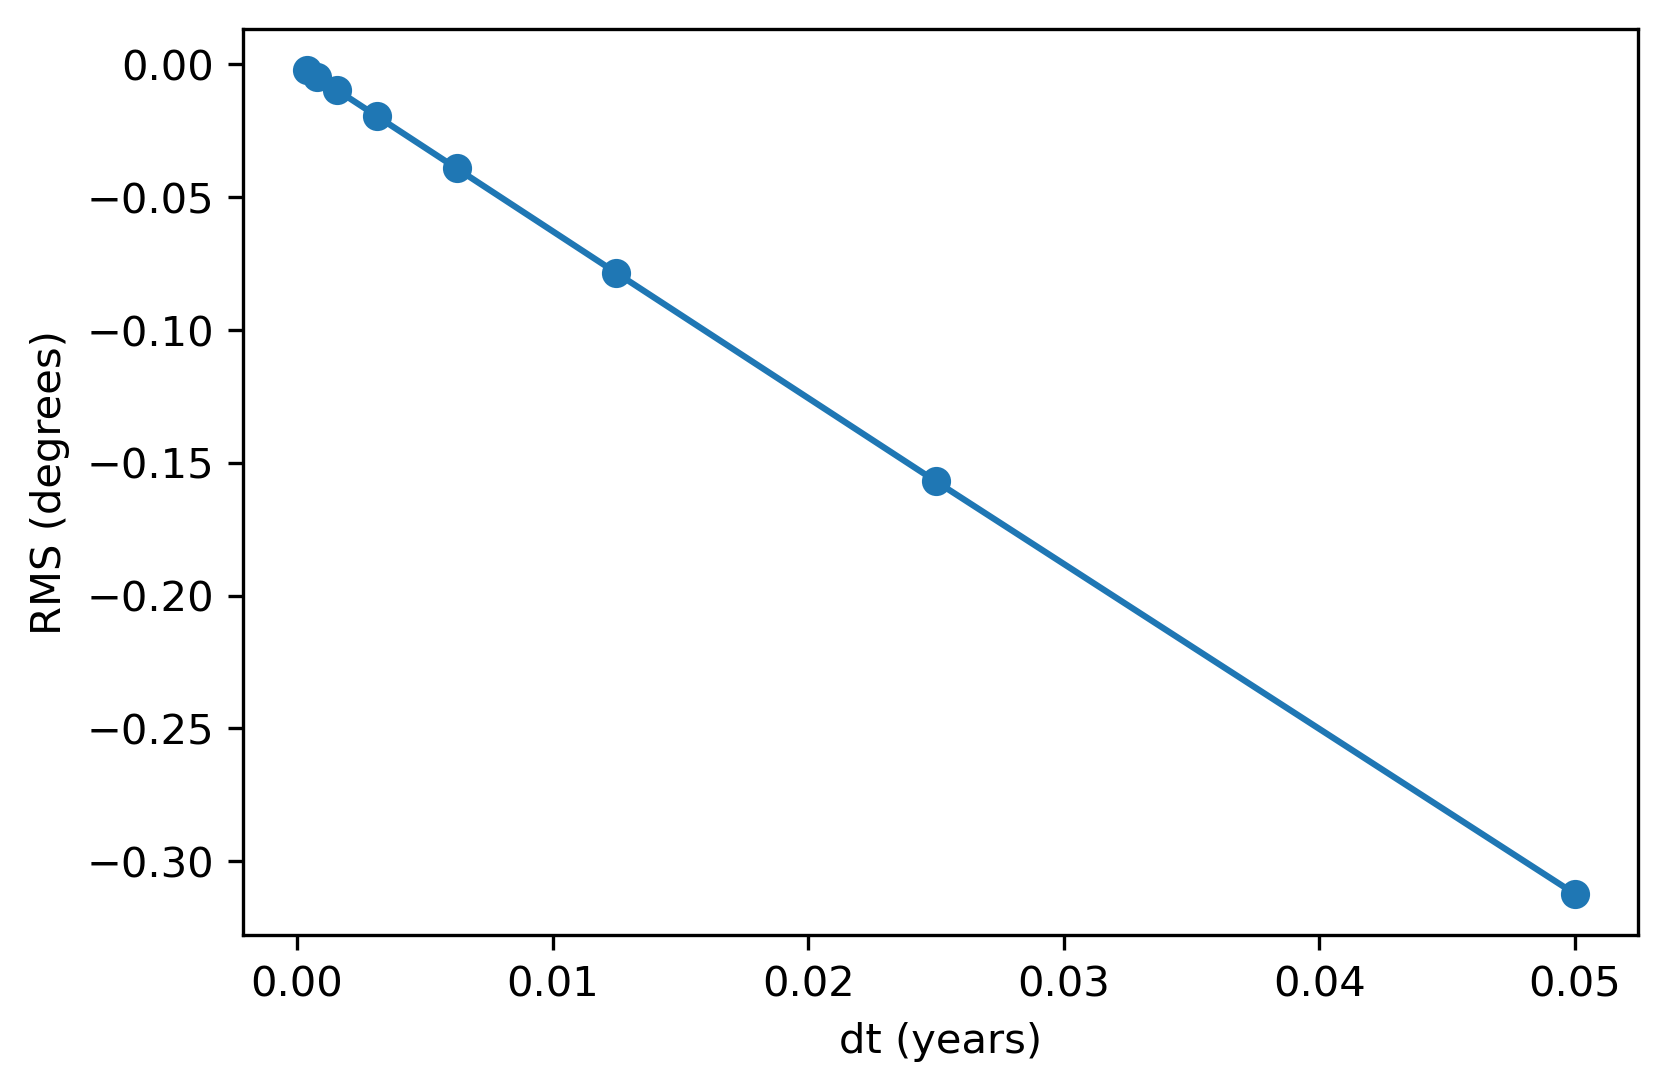

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

##################################
dts = np.array([0.0001953125,0.000390625,0.00078125,0.0015625,0.003125,0.00625,0.0125,0.025,0.05])
outfs = []
for dt in dts:
    outfs.append(r'test_torque_out_'+str(dt)+'dt.txt')

n = 1000
nv = 3

angle = 0
omega = 1
t = nv - 1
##################################

f = open(outfs[0], "r")
allLines = f.readlines()

data = np.zeros((n, nv))

for i in range(n):
    datum = allLines[i].split()
    for j in range(nv):
        data[i,j] = float(datum[j])

true_vals = data[1:,angle]

rms = np.zeros(len(outfs)-1)

for i in range(1,len(outfs)):
    f = open(outfs[i], "r")
    allLines = f.readlines()

    data = np.zeros((n, nv))

    for j in range(n):
        datum = allLines[j].split()
        for k in range(nv):
            data[j,k] = float(datum[k])
            
    # rms[i-1] = np.sqrt(np.sum((data[1:,angle]-true_vals)**2))
    rms[i-1] = np.mean(data[1:,angle])
        
plt.scatter(dts[1:],rms)
# plt.xscale('log')
# plt.yscale('log')
# plt.loglog(dts[1:],rms)
plt.plot(dts[1:],rms)
plt.ylabel("RMS (degrees)")
plt.xlabel("dt (years)")

#log_slope = (np.log(rms[-1]) - np.log(rms[0])) / (np.log(dts[-1])-np.log(dts[1]))
#plt.title("slope in log scale: "+str(log_slope))